In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
import os
import cv2

path = 'C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Training'
classes = {'notumor': 0, 'pituitary': 1, 'glioma': 2, 'meningioma': 3}
X = []
Y = []

# Dictionary to keep track of the number of images added per class
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}
max_images_per_class = 200

for cls, label in classes.items():
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if class_counts[label] < max_images_per_class:
            img = cv2.imread(os.path.join(pth, j), 0)  # Load the image in grayscale (0)
            img = cv2.resize(img, (200, 200))  # Resize the image to 200x200
            X.append(img)
            Y.append(label)
            class_counts[label] += 1

In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
pd.Series(Y).value_counts()

0    200
1    200
2    200
3    200
Name: count, dtype: int64

In [20]:
X_updated = X.reshape(len(X), -1)

In [21]:
X.shape, X_updated.shape

((800, 200, 200), (800, 40000))

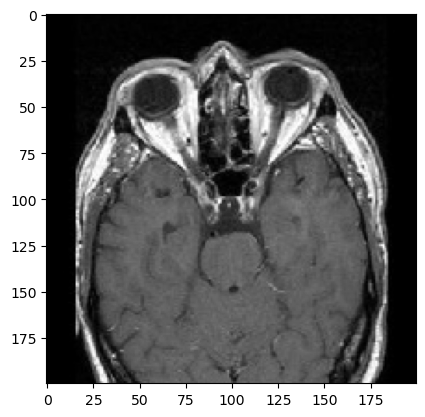

In [22]:
plt.imshow(X[0], cmap='gray')

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [24]:
xtrain.shape, xtest.shape

((640, 40000), (160, 40000))

In [25]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [26]:
from sklearn.svm import SVC

In [57]:
sv = SVC(kernel='linear',probability=True)
sv.fit(xtrain,ytrain)

SVC(kernel='linear', probability=True)

In [29]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8125


In [30]:
pred = sv.predict(xtest)

In [31]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  2,  12,  15,  17,  20,  26,  27,  38,  43,  48,  49,  52,  56,
         62,  65,  70,  87,  97, 103, 108, 117, 121, 127, 140, 147, 148,
        149, 150, 154, 159], dtype=int64),)

In [32]:
dec = {0: 'notumor', 1: 'pituitary',2:'glioma',3: 'meningioma'}

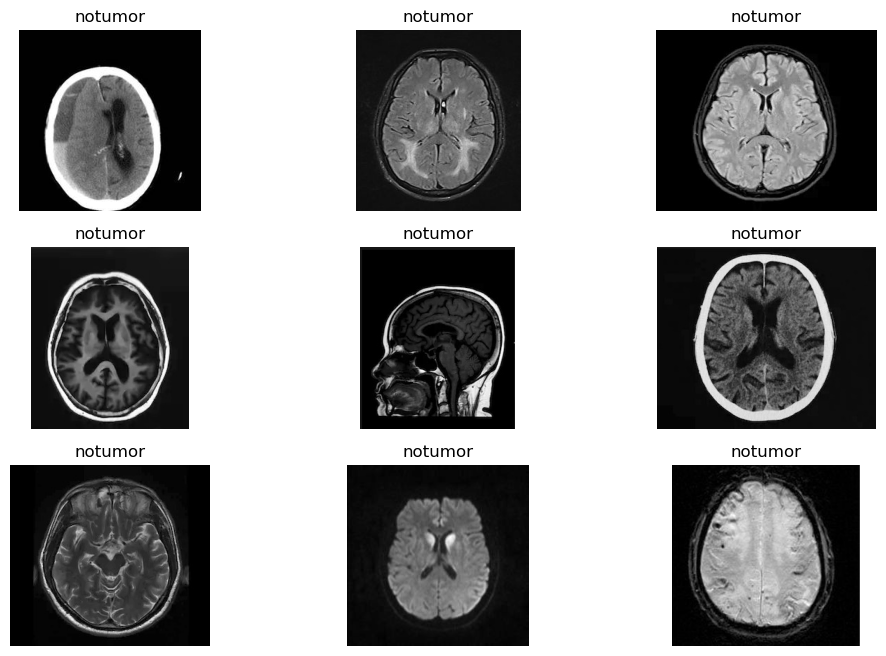

In [34]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/notumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

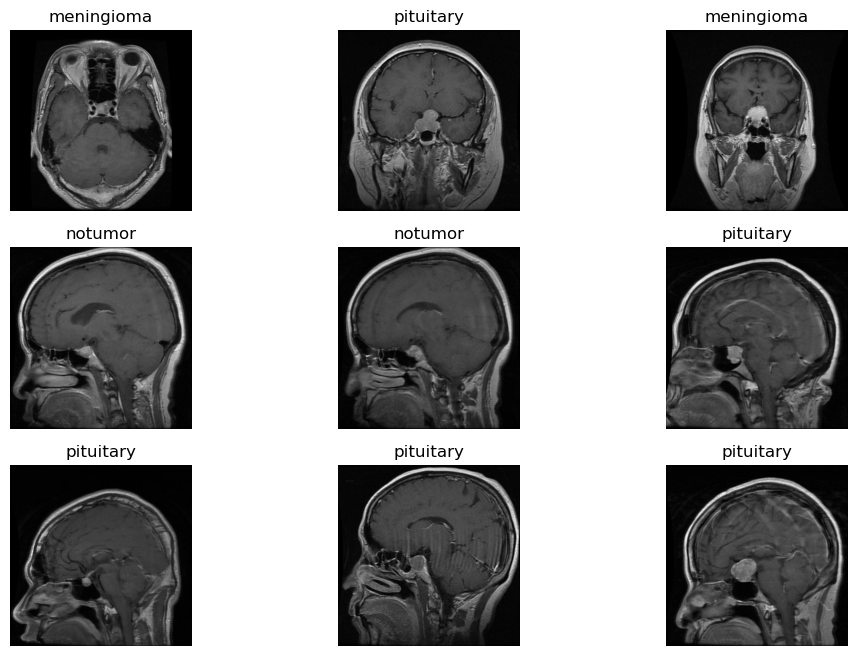

In [35]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/pituitary'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

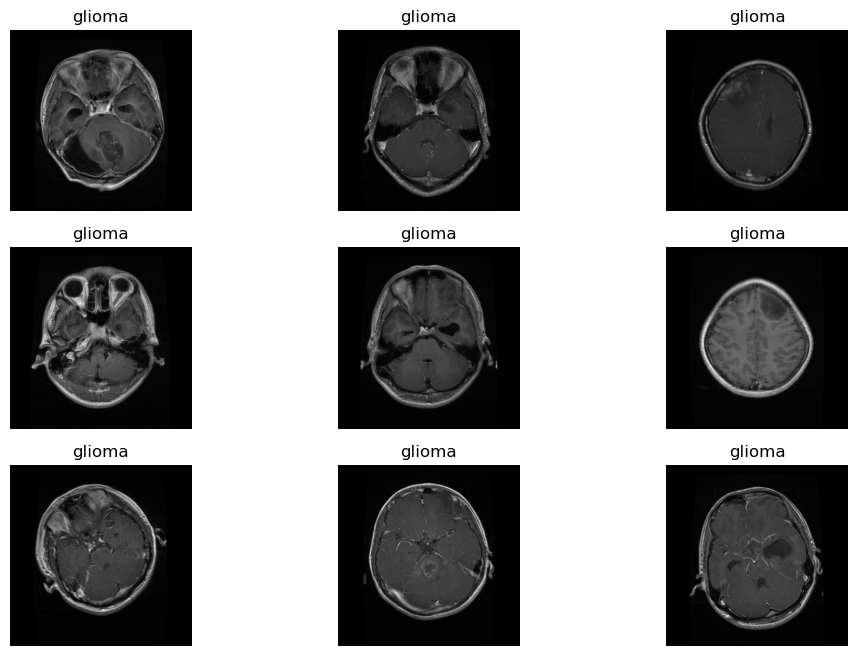

In [36]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/glioma'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

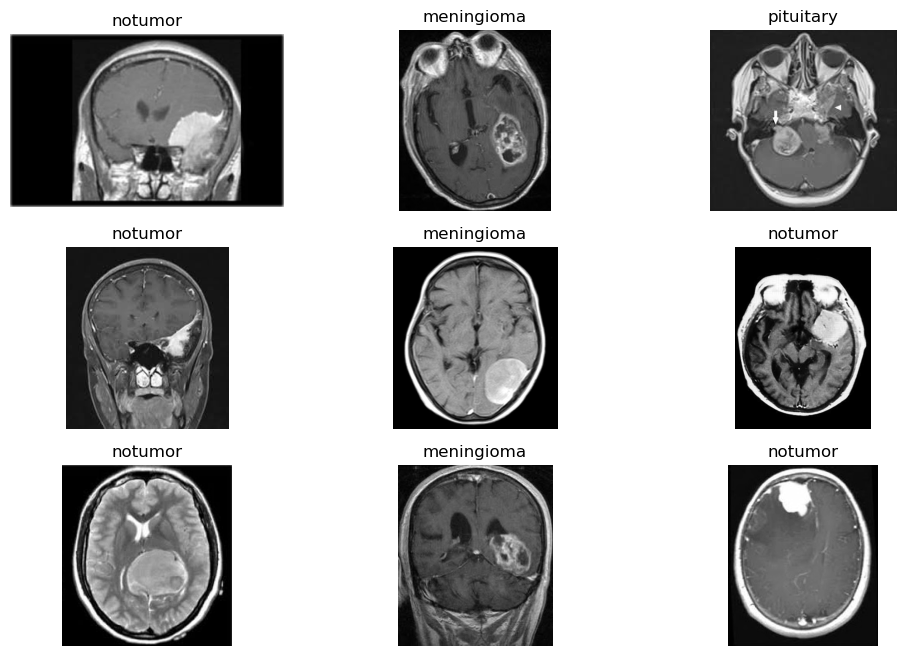

In [37]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/meningioma'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,RocCurveDisplay,roc_curve,auc
preds = sv.predict(xtest)
print(classification_report(preds,ytest))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       1.00      0.92      0.96        49
           2       0.75      0.79      0.77        38
           3       0.70      0.68      0.69        34

    accuracy                           0.81       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.82      0.81      0.81       160



In [41]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted')

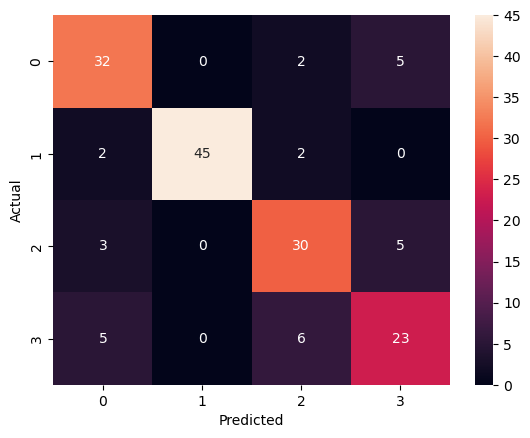

In [46]:
sns.heatmap(confusion_matrix(preds,ytest),annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [48]:
accuracy_score(preds,ytest)

0.8125

In [61]:
y_scores = sv.predict_proba(xtest) 

<Figure size 640x480 with 0 Axes>

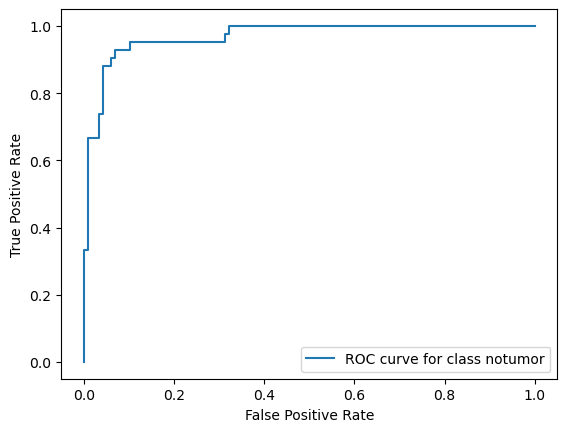

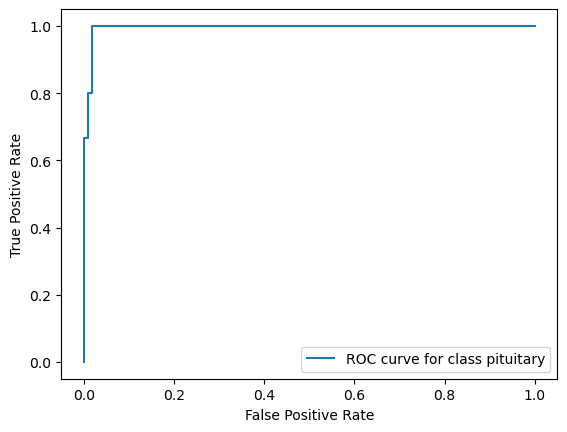

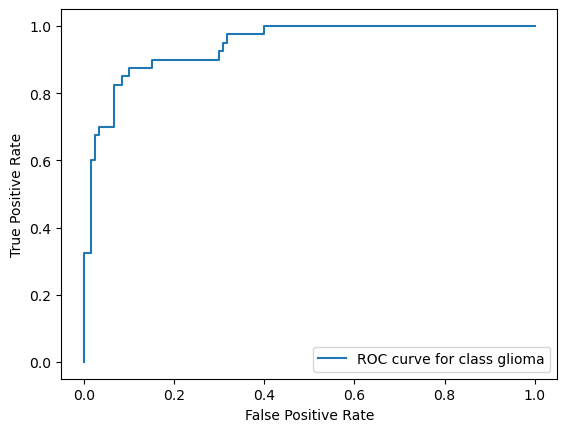

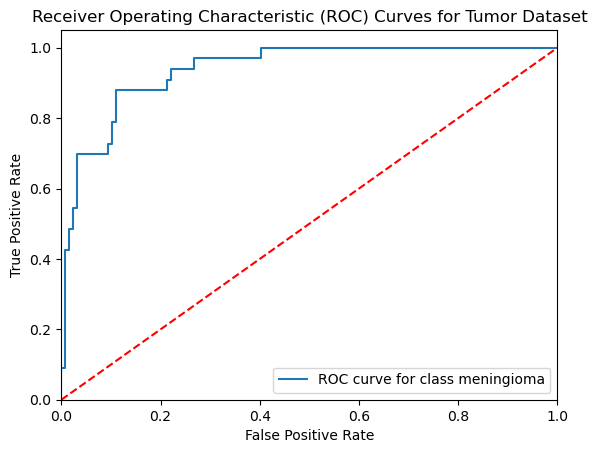

In [73]:
from sklearn.preprocessing import label_binarize
# Binarize the labels for multi-class ROC
y_bin = label_binarize(ytest, classes=list(classes.values()))
n_classes = y_bin.shape[1]

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(label=f'ROC curve for class {list(classes.keys())[i]}')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Tumor Dataset')
plt.legend(loc='lower right')
plt.show()
